In [114]:
# Data Manipulation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

#Machine Learnin
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error


#OS
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        
import joblib

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [115]:
train_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [116]:
test_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [117]:
train_df.shape, test_df.shape

((1460, 81), (1459, 80))

In [118]:
combined = [train_df, test_df]

In [119]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [120]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [121]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


# Fill NaN Values :

In [122]:
cols_to_drop = []
cols_to_correct = []
cols_to_correct_2 = []

In [123]:
for dataset in combined :
    for col in dataset.columns:
        null_count = len(dataset) - dataset[col].isnull().sum()
        if null_count < 300 and col not in cols_to_drop:
            cols_to_drop.append(col)
        elif 300 <= null_count <= 1000 and col not in cols_to_correct:
            cols_to_correct.append(col)
        elif 1000 <= null_count < len(dataset) and col not in cols_to_correct_2:
            cols_to_correct_2.append(col)


In [124]:
cols_to_drop, cols_to_correct, cols_to_correct_2

(['Alley', 'PoolQC', 'Fence', 'MiscFeature'],
 ['MasVnrType', 'FireplaceQu'],
 ['LotFrontage',
  'MasVnrArea',
  'BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'BsmtFinType2',
  'Electrical',
  'GarageType',
  'GarageYrBlt',
  'GarageFinish',
  'GarageQual',
  'GarageCond',
  'MSZoning',
  'Utilities',
  'Exterior1st',
  'Exterior2nd',
  'BsmtFinSF1',
  'BsmtFinSF2',
  'BsmtUnfSF',
  'TotalBsmtSF',
  'BsmtFullBath',
  'BsmtHalfBath',
  'KitchenQual',
  'Functional',
  'GarageCars',
  'GarageArea',
  'SaleType'])

Drop :

- id
- Alley
- PoolQC
- Fence
- MiscFeature

Correct :

- MasVnrType
- FireplaceQu

Correct (with median):
-  BsmtCond
-  BsmtExposure
-  BsmtFinSF1
-  BsmtFinSF2
-  BsmtFinType1
-  BsmtFinType2
-  BsmtFullBath
-  BsmtHalfBath
-  BsmtQual
-  BsmtUnfSF
-  Electrical
-  Exterior1st
-  Exterior2nd
-  Functional
-  GarageArea
-  GarageCars
-  GarageCond
-  GarageFinish
-  GarageQual
-  GarageType
-  GarageYrBlt
-  KitchenQual
-  LotFrontage
-  MSZoning
-  MasVnrArea
-  SaleType
-  TotalBsmtSF
-  Utilities

In [125]:
for dataset in combined:
    for col in cols_to_drop:
        dataset.drop(col, axis=1, inplace=True)
        
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [126]:
for dataset in combined:
    dataset_num = dataset.select_dtypes(include=['float64', 'int64'])
    dataset_cat = dataset.select_dtypes(include=['object', 'category'])

    for col in cols_to_correct_2:        
        dataset_num[col] = dataset_num[col].fillna(dataset_num[col].dropna().mean())
        dataset_num[col] = dataset_num[col].fillna(dataset_num[col].dropna().mode()[0])    

In [127]:
combined = [train_df, test_df]

In [128]:
new = train_df.copy().drop('Id',axis=1)
new.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [129]:
cat_cols = train_df.select_dtypes(include=['object', 'category']).columns

In [130]:
_2_cat = []
_cats = []
for col in cat_cols:
    if train_df[col].nunique() == 2:
        _2_cat.append(col)
    else:
        _cats.append(col)

In [131]:
new.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [132]:
for col in _2_cat:
    new = pd.get_dummies(new, columns=[col], drop_first=True)

In [133]:
new.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Street_Pave,Utilities_NoSeWa,CentralAir_Y
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,0,0,2,2008,WD,Normal,208500,True,False,True
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,0,0,5,2007,WD,Normal,181500,True,False,True
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,0,0,9,2008,WD,Normal,223500,True,False,True
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,0,0,2,2006,WD,Abnorml,140000,True,False,True
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,0,0,12,2008,WD,Normal,250000,True,False,True


In [134]:
for col in _cats:
    categories = [new[col].unique()]
    encoder = OrdinalEncoder(categories=categories)
    encoded_data = encoder.fit_transform(new[[col]])
    new[col] = encoded_data
    
new.select_dtypes(include=['object', 'category'])

""
0
1
2
3
4
...
1455
1456
1457
1458


In [135]:
new.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Street_Pave,Utilities_NoSeWa,CentralAir_Y
0,60,0.0,65.0,8450,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,2,2008,0.0,0.0,208500,True,False,True
1,20,0.0,80.0,9600,0.0,0.0,1.0,0.0,1.0,1.0,...,0,0,5,2007,0.0,0.0,181500,True,False,True
2,60,0.0,68.0,11250,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,9,2008,0.0,0.0,223500,True,False,True
3,70,0.0,60.0,9550,1.0,0.0,2.0,0.0,2.0,0.0,...,0,0,2,2006,0.0,1.0,140000,True,False,True
4,60,0.0,84.0,14260,1.0,0.0,1.0,0.0,3.0,0.0,...,0,0,12,2008,0.0,0.0,250000,True,False,True


In [136]:
new["Utilities_NoSeWa"].dtype

dtype('bool')

In [137]:
corr = new.corr(method='spearman')

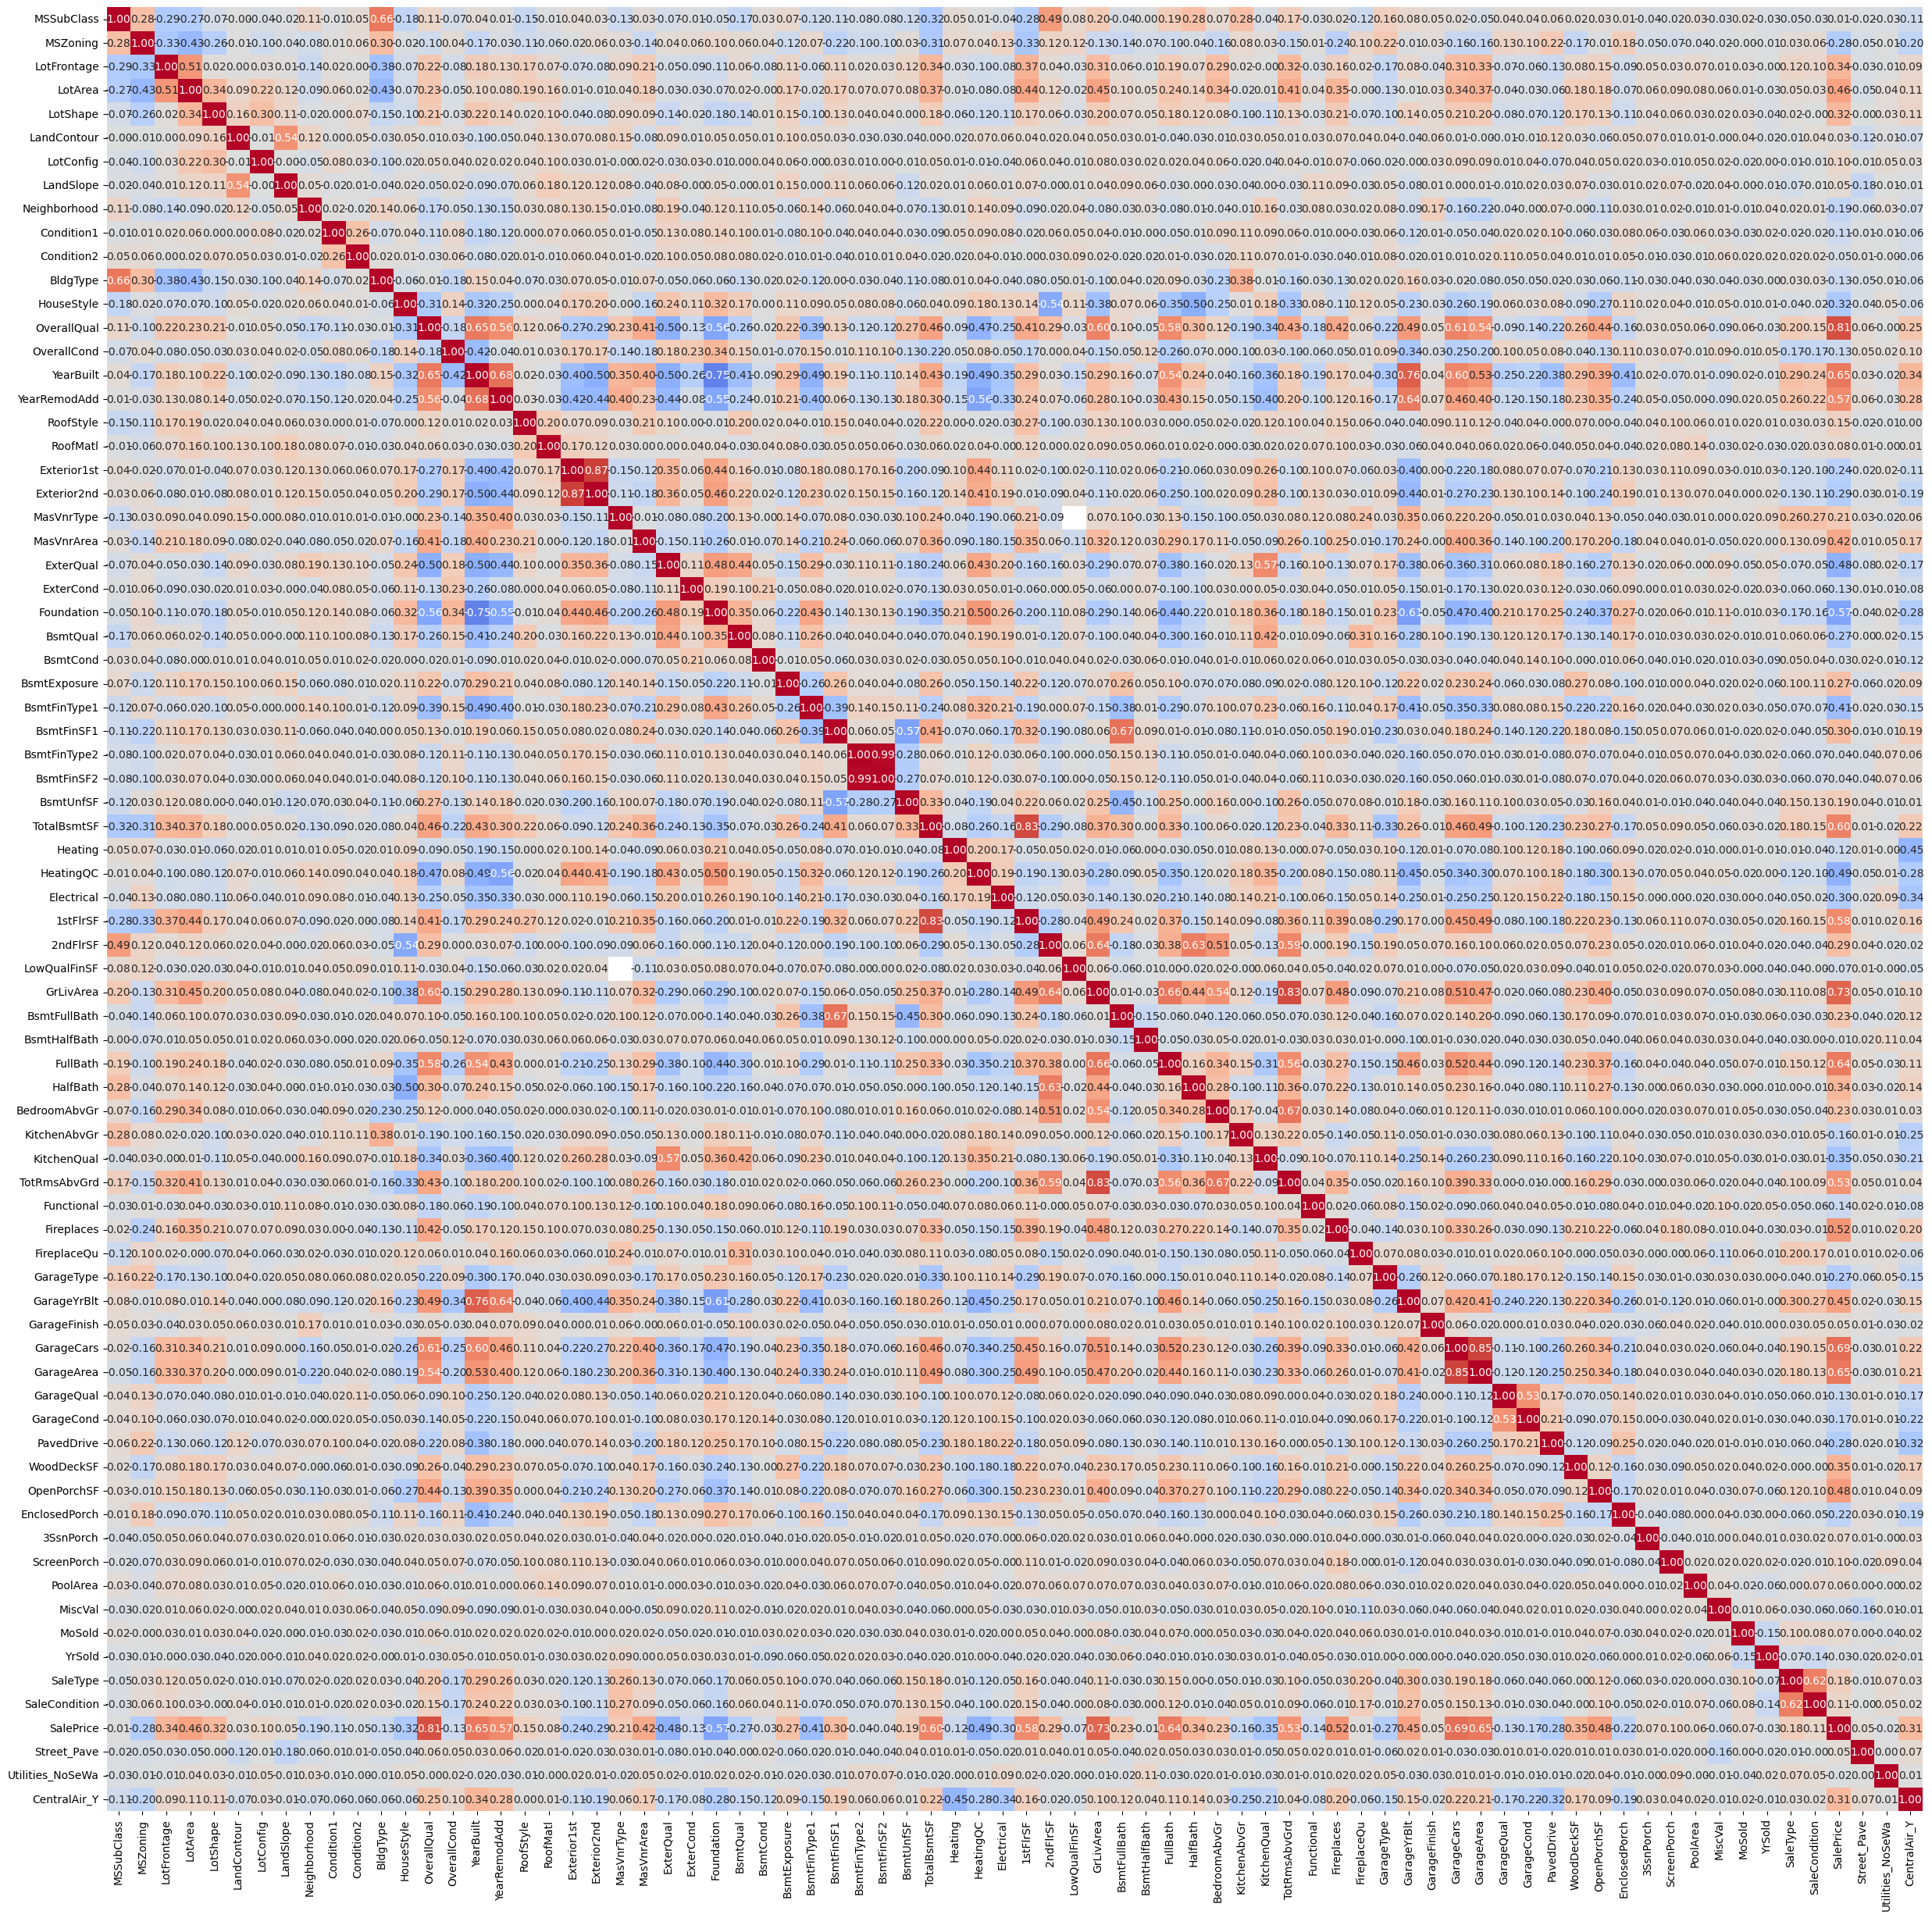

In [138]:
plt.figure(figsize=(30, 30))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, cbar=False)
plt.show()

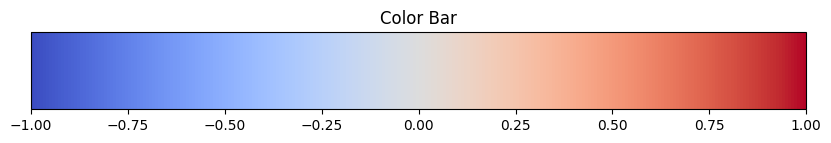

In [139]:
# Create a separate figure for the horizontal color bar
plt.figure(figsize=(10, 1))  # Adjust size as needed
cbar_ax = plt.gca()  # Get the current axis
norm = plt.Normalize(vmin=-1, vmax=1)  # Normalize with the same limits
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
sm.set_array([])  # Empty array for the color bar

# Add horizontal color bar to the figure
plt.colorbar(sm, cax=cbar_ax, orientation='horizontal')
plt.title('Color Bar')
plt.show()

In [140]:
corr_long = corr.stack().reset_index()
corr_long.columns = ['Feature1', 'Feature2', 'Correlation']

corr_long = corr_long[corr_long['Feature1'] != corr_long['Feature2']]
corr_long = corr_long[corr_long['Feature1'] < corr_long['Feature2']]

corr_long['AbsCorrelation'] = corr_long['Correlation'].abs()
sorted_corr = corr_long.sort_values(by='AbsCorrelation', ascending=False)

sorted_corr[sorted_corr["AbsCorrelation"]>0.6]

,Feature1,Feature2,Correlation,AbsCorrelation
2462,BsmtFinSF2,BsmtFinType2,0.991829,0.991829
1464,Exterior1st,Exterior2nd,0.865923,0.865923
4386,GarageArea,GarageCars,0.853317,0.853317
2921,1stFlrSF,TotalBsmtSF,0.829292,0.829292
3163,GrLivArea,TotRmsAbvGrd,0.827874,0.827874
1060,OverallQual,SalePrice,0.809829,0.809829
4117,GarageYrBlt,YearBuilt,0.756721,0.756721
1914,Foundation,YearBuilt,-0.745774,0.745774
3186,GrLivArea,SalePrice,0.731310,0.731310
4326,GarageCars,SalePrice,0.690711,0.690711


In [141]:
sorted_corr[(sorted_corr["Feature1"] == "MasVnrType") | (sorted_corr["Feature2"] == "MasVnrType")].head(3)

,Feature1,Feature2,Correlation,AbsCorrelation
1612,MasVnrType,YearRemodAdd,0.395464,0.395464
4123,GarageYrBlt,MasVnrType,0.346990,0.346990
1611,MasVnrType,YearBuilt,0.345886,0.345886


In [142]:
new["YearRemodAddBins"] = pd.cut(new['YearRemodAdd'], bins=5)
new['YearRemodAdd_Type'] = new['YearRemodAddBins'].cat.codes

new["GarageYrBltBins"] = pd.cut(new['GarageYrBlt'], bins=5)
new['GarageYrBlt_Type'] = new['GarageYrBltBins'].cat.codes

In [143]:
for i in new['GarageYrBlt_Type'].unique():
    for j in new['YearRemodAdd_Type'].unique():
        part_df = new[(new["GarageYrBlt_Type"]==i) & (new["YearRemodAdd_Type"]==j)]["MasVnrType"].dropna()
        m = part_df.median()
        new.loc[ (new.MasVnrType.isnull()) & (new.GarageYrBlt_Type == i) & (new.YearRemodAdd_Type == j),'MasVnrType'] = m

In [144]:
new["MasVnrType"].isnull().sum()

43

In [145]:
# Adjust non corrected data
new.loc[ new.MasVnrType.isnull(),'MasVnrType'] = new["MasVnrType"].dropna().median()

In [146]:
new["MasVnrType"].unique()

array([0., 2., 3.])

In [147]:
sorted_corr[(sorted_corr["Feature1"] == "FireplaceQu") | (sorted_corr["Feature2"] == "FireplaceQu")].head(3)

,Feature1,Feature2,Correlation,AbsCorrelation
2027,BsmtQual,FireplaceQu,0.313560,0.313560
3971,FireplaceQu,MasVnrType,0.236787,0.236787
4020,FireplaceQu,SaleType,0.195711,0.195711


In [148]:
for i in new['BsmtQual'].unique():
    for j in new['MasVnrType'].unique():
        part_df = new[(new["BsmtQual"]==i) & (new["MasVnrType"]==j)]["FireplaceQu"].dropna()
        m = part_df.median()
        new.loc[ (new.FireplaceQu.isnull()) & (new.BsmtQual == i) & (new.MasVnrType == j),'FireplaceQu'] = m

In [149]:
new["FireplaceQu"].isnull().sum()

3

In [150]:
new.loc[ new.FireplaceQu.isnull(),'FireplaceQu'] = new["FireplaceQu"].dropna().median()

In [151]:
new["FireplaceQu"].unique()

array([1. , 2. , 3. , 4. , 1.5, 5. ])

In [152]:
new.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,SaleType,SaleCondition,SalePrice,Street_Pave,Utilities_NoSeWa,CentralAir_Y,YearRemodAddBins,YearRemodAdd_Type,GarageYrBltBins,GarageYrBlt_Type
0,60,0.0,65.0,8450,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,208500,True,False,True,"(1998.0, 2010.0]",4,"(1988.0, 2010.0]",4
1,20,0.0,80.0,9600,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,181500,True,False,True,"(1974.0, 1986.0]",2,"(1966.0, 1988.0]",3
2,60,0.0,68.0,11250,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,223500,True,False,True,"(1998.0, 2010.0]",4,"(1988.0, 2010.0]",4
3,70,0.0,60.0,9550,1.0,0.0,2.0,0.0,2.0,0.0,...,0.0,1.0,140000,True,False,True,"(1962.0, 1974.0]",1,"(1988.0, 2010.0]",4
4,60,0.0,84.0,14260,1.0,0.0,1.0,0.0,3.0,0.0,...,0.0,0.0,250000,True,False,True,"(1998.0, 2010.0]",4,"(1988.0, 2010.0]",4


In [153]:
for col in new.columns:
    if new[col].dtype == bool:
        new[col]=new[col].astype(int)

In [154]:
for col in new.columns:
    if new[col].dtype != int:
        print(col)

MSZoning
LotFrontage
LotShape
LandContour
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition
YearRemodAddBins
YearRemodAdd_Type
GarageYrBltBins
GarageYrBlt_Type


In [155]:
new.drop(["YearRemodAddBins", "GarageYrBltBins"], axis=1, inplace=True)
new.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Street_Pave,Utilities_NoSeWa,CentralAir_Y,YearRemodAdd_Type,GarageYrBlt_Type
0,60,0.0,65.0,8450,0.0,0.0,0.0,0.0,0.0,0.0,...,2,2008,0.0,0.0,208500,1,0,1,4,4
1,20,0.0,80.0,9600,0.0,0.0,1.0,0.0,1.0,1.0,...,5,2007,0.0,0.0,181500,1,0,1,2,3
2,60,0.0,68.0,11250,1.0,0.0,0.0,0.0,0.0,0.0,...,9,2008,0.0,0.0,223500,1,0,1,4,4
3,70,0.0,60.0,9550,1.0,0.0,2.0,0.0,2.0,0.0,...,2,2006,0.0,1.0,140000,1,0,1,1,4
4,60,0.0,84.0,14260,1.0,0.0,1.0,0.0,3.0,0.0,...,12,2008,0.0,0.0,250000,1,0,1,4,4


In [156]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MSSubClass         1460 non-null   int64  
 1   MSZoning           1460 non-null   float64
 2   LotFrontage        1460 non-null   float64
 3   LotArea            1460 non-null   int64  
 4   LotShape           1460 non-null   float64
 5   LandContour        1460 non-null   float64
 6   LotConfig          1460 non-null   float64
 7   LandSlope          1460 non-null   float64
 8   Neighborhood       1460 non-null   float64
 9   Condition1         1460 non-null   float64
 10  Condition2         1460 non-null   float64
 11  BldgType           1460 non-null   float64
 12  HouseStyle         1460 non-null   float64
 13  OverallQual        1460 non-null   int64  
 14  OverallCond        1460 non-null   int64  
 15  YearBuilt          1460 non-null   int64  
 16  YearRemodAdd       1460 

# **Numeric Outliers Treatment :**

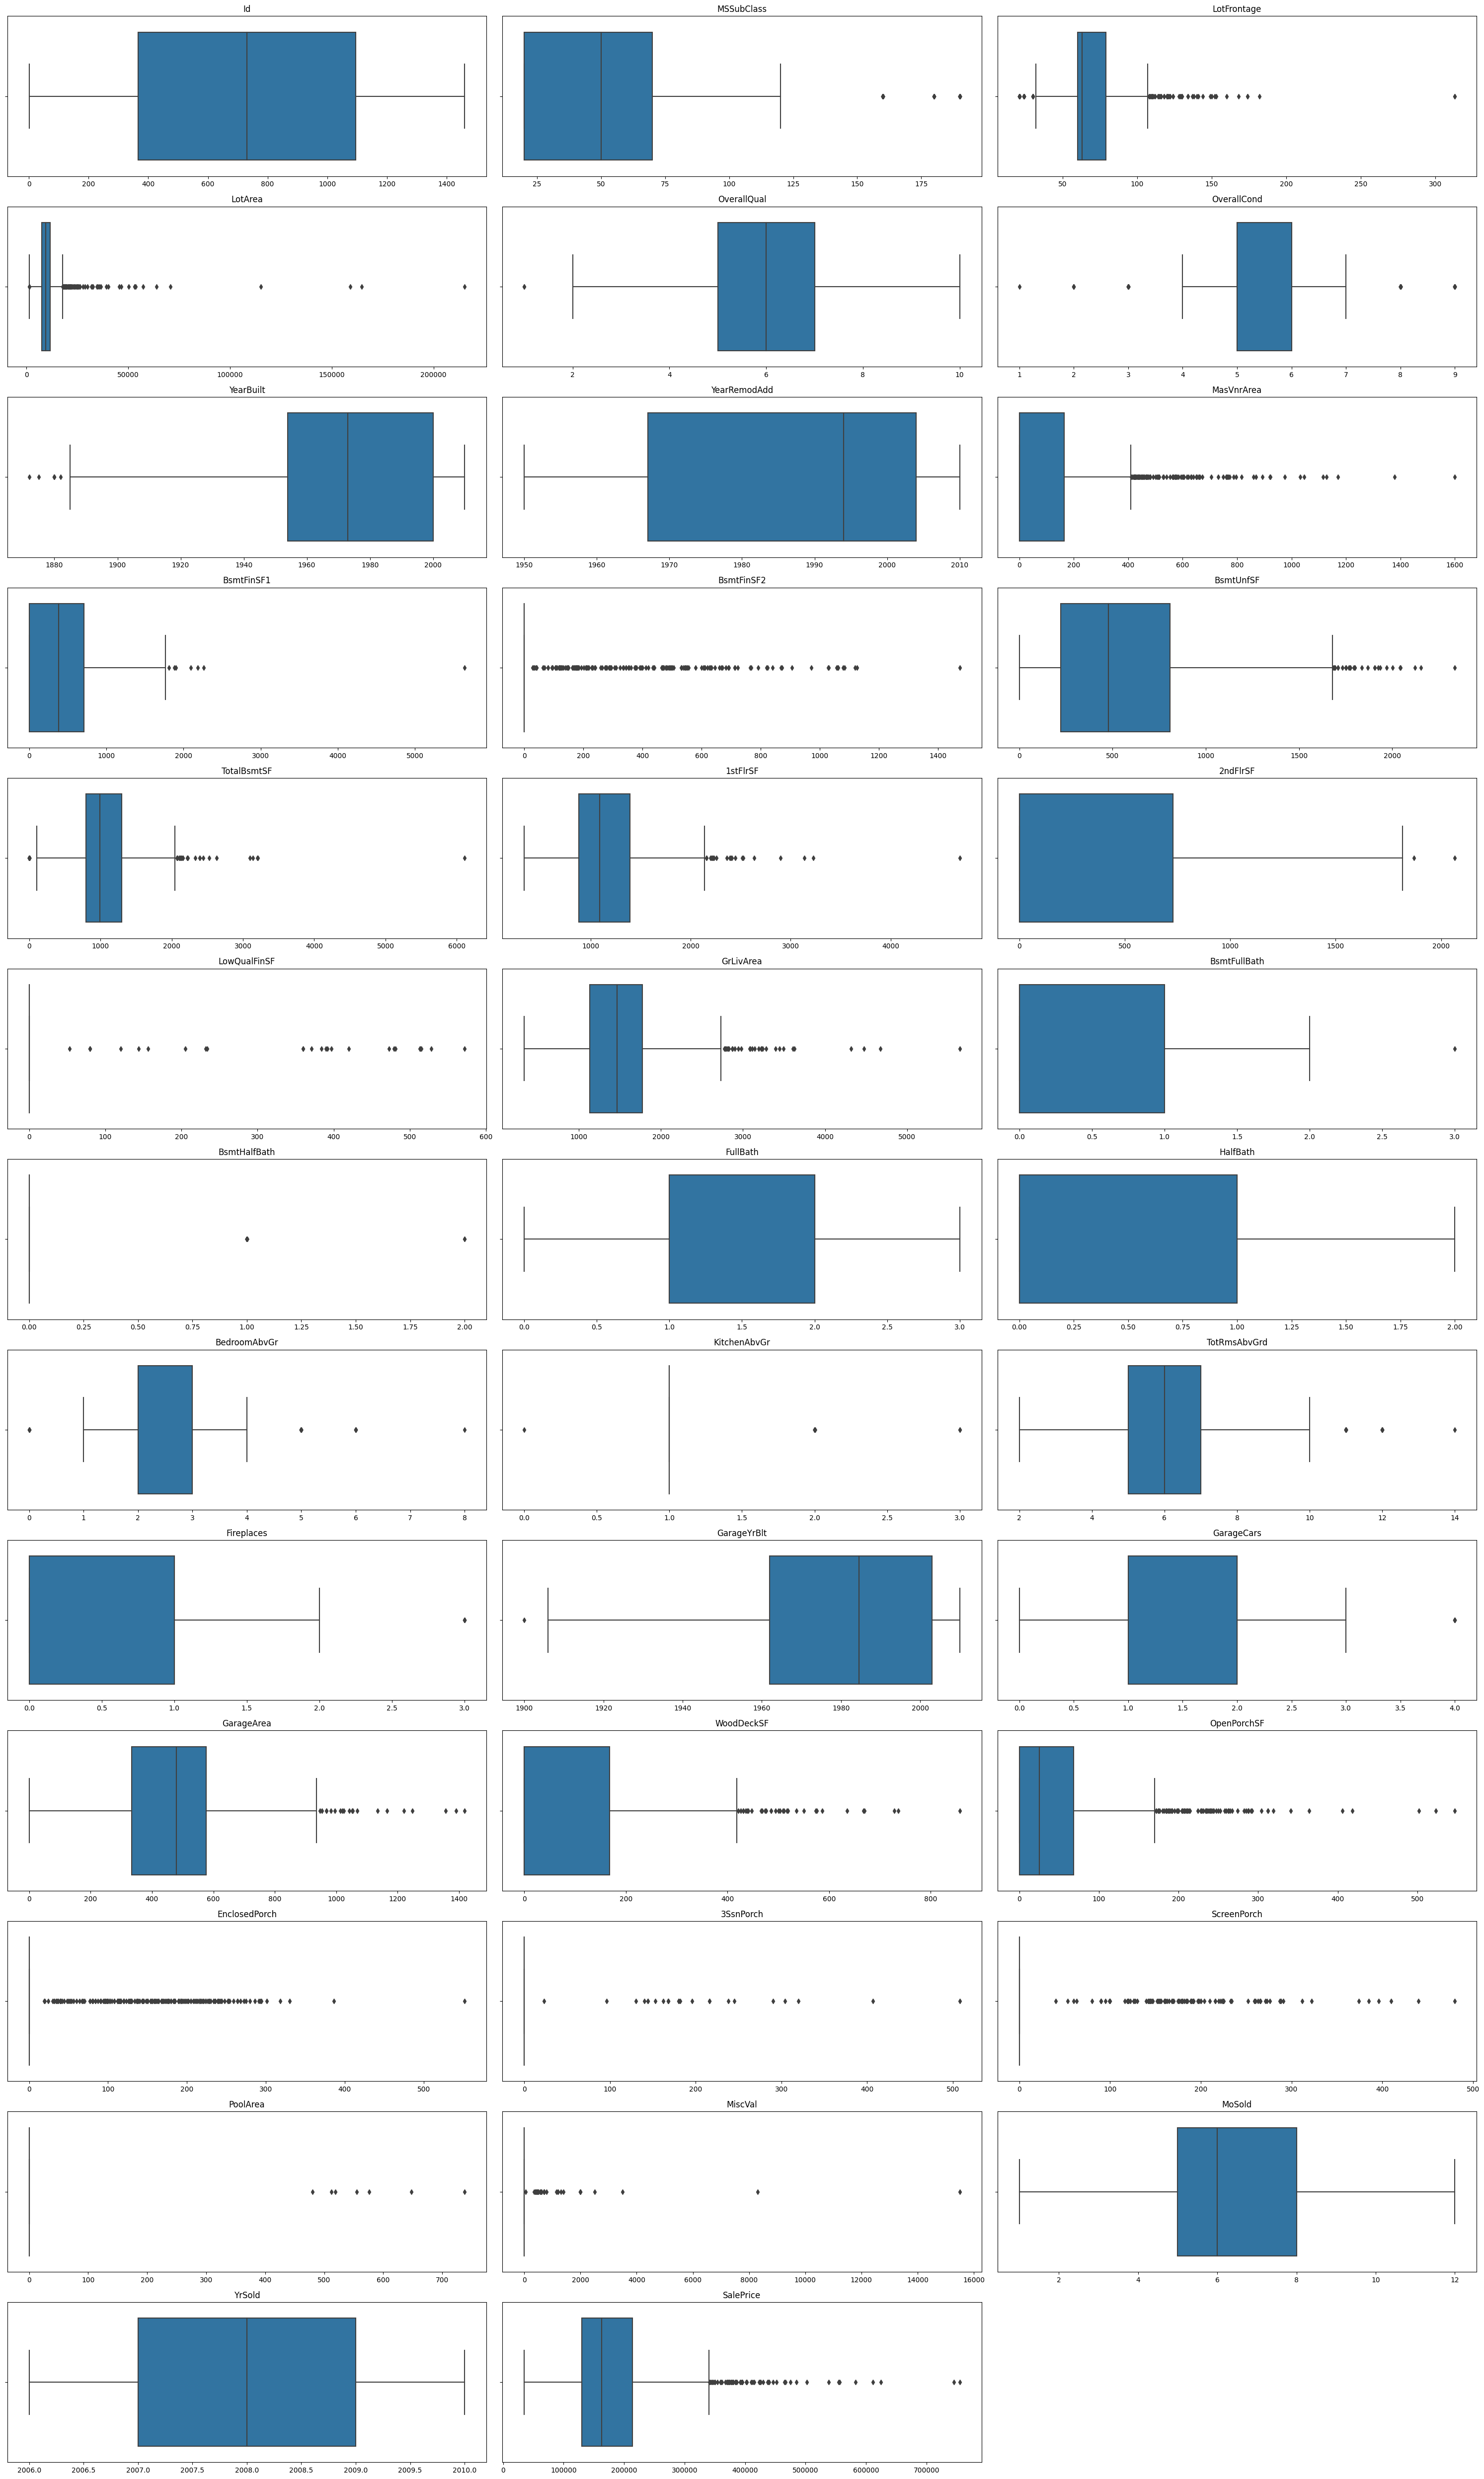

In [158]:
num_features = len(train_df.select_dtypes(include=['float64', 'int64']).columns)

# Create a figure with subplots
fig, axes = plt.subplots(nrows=(num_features // 3) + 1, ncols=3, figsize=(30, 50))
axes = axes.flatten()  # Flatten the 2D array of axes for easy indexing

# Plot each column
for i, col in enumerate(train_df.select_dtypes(include=['float64', 'int64']).columns):
    sns.boxplot(data=train_df, x=col, showfliers=True, notch=False, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')

# Hide any remaining empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [159]:
# select data
numeric_columns = train_df.select_dtypes(include=['float64', 'int64']).columns
length = len(numeric_columns)

# 
for column in numeric_columns:
    Q1 = train_df[column].quantile(0.25)
    Q3 = train_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    train_df[column] = np.where(train_df[column] < lower_bound, lower_bound, train_df[column])
    train_df[column] = np.where(train_df[column] > upper_bound, upper_bound, train_df[column])

In [160]:
for col in _2_cat:
    train_df = pd.get_dummies(train_df, columns=[col], drop_first=True)
for col in _cats:
    categories = [train_df[col].unique()]
    encoder = OrdinalEncoder(categories=categories)
    encoded_data = encoder.fit_transform(train_df[[col]])
    train_df[col] = encoded_data

train_df["YearRemodAddBins"] = pd.cut(train_df['YearRemodAdd'], bins=5)
train_df['YearRemodAdd_Type'] = train_df['YearRemodAddBins'].cat.codes

train_df["GarageYrBltBins"] = pd.cut(train_df['GarageYrBlt'], bins=5)
train_df['GarageYrBlt_Type'] = train_df['GarageYrBltBins'].cat.codes
for i in train_df['GarageYrBlt_Type'].unique():
    for j in train_df['YearRemodAdd_Type'].unique():
        part_df = train_df[(train_df["GarageYrBlt_Type"]==i) & (train_df["YearRemodAdd_Type"]==j)]["MasVnrType"].dropna()
        m = part_df.median()
        train_df.loc[ (train_df.MasVnrType.isnull()) & (train_df.GarageYrBlt_Type == i) & (train_df.YearRemodAdd_Type == j),'MasVnrType'] = m


# Adjust non corrected data
train_df.loc[ train_df.MasVnrType.isnull(),'MasVnrType'] = train_df["MasVnrType"].dropna().median()

for i in train_df['BsmtQual'].unique():
    for j in train_df['MasVnrType'].unique():
        part_df = train_df[(dataset["BsmtQual"]==i) & (train_df["MasVnrType"]==j)]["FireplaceQu"].dropna()
        m = part_df.median()
        train_df.loc[ (train_df.FireplaceQu.isnull()) & (train_df.BsmtQual == i) & (train_df.MasVnrType == j),'FireplaceQu'] = m
        
train_df.loc[ train_df.FireplaceQu.isnull(),'FireplaceQu'] = train_df["FireplaceQu"].dropna().median()


train_df.drop(["YearRemodAddBins", "GarageYrBltBins"], axis=1, inplace=True)
for col in train_df.columns:
    if train_df[col].dtype == bool:
        train_df[col]=train_df[col].astype(int)

In [161]:
train_df.loc[ train_df.FireplaceQu.isnull(),'FireplaceQu'] = train_df["FireplaceQu"].dropna().median()

In [162]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Street_Pave,Utilities_NoSeWa,CentralAir_Y,YearRemodAdd_Type,GarageYrBlt_Type
0,1.0,60.0,0.0,65.0,8450.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2008.0,0.0,0.0,208500.0,1,0,1,4,4
1,2.0,20.0,0.0,80.0,9600.0,0.0,0.0,1.0,0.0,1.0,...,5.0,2007.0,0.0,0.0,181500.0,1,0,1,2,3
2,3.0,60.0,0.0,68.0,11250.0,1.0,0.0,0.0,0.0,0.0,...,9.0,2008.0,0.0,0.0,223500.0,1,0,1,4,4
3,4.0,70.0,0.0,60.0,9550.0,1.0,0.0,2.0,0.0,2.0,...,2.0,2006.0,0.0,1.0,140000.0,1,0,1,1,4
4,5.0,60.0,0.0,84.0,14260.0,1.0,0.0,1.0,0.0,3.0,...,12.0,2008.0,0.0,0.0,250000.0,1,0,1,4,4


In [163]:
for col in _2_cat:
    test_df = pd.get_dummies(test_df, columns=[col], drop_first=True)
for col in _cats:
    categories = [test_df[col].unique()]
    encoder = OrdinalEncoder(categories=categories)
    encoded_data = encoder.fit_transform(test_df[[col]])
    test_df[col] = encoded_data

test_df["YearRemodAddBins"] = pd.cut(test_df['YearRemodAdd'], bins=5)
test_df['YearRemodAdd_Type'] = test_df['YearRemodAddBins'].cat.codes

test_df["GarageYrBltBins"] = pd.cut(test_df['GarageYrBlt'], bins=5)
test_df['GarageYrBlt_Type'] = test_df['GarageYrBltBins'].cat.codes
for i in test_df['GarageYrBlt_Type'].unique():
    for j in test_df['YearRemodAdd_Type'].unique():
        part_df = test_df[(test_df["GarageYrBlt_Type"]==i) & (test_df["YearRemodAdd_Type"]==j)]["MasVnrType"].dropna()
        m = part_df.median()
        test_df.loc[ (test_df.MasVnrType.isnull()) & (test_df.GarageYrBlt_Type == i) & (test_df.YearRemodAdd_Type == j),'MasVnrType'] = m

# Adjust non corrected data
test_df.loc[ test_df.MasVnrType.isnull(),'MasVnrType'] = test_df["MasVnrType"].dropna().median()
for i in test_df['BsmtQual'].unique():
    for j in test_df['MasVnrType'].unique():
        part_df = test_df[(dataset["BsmtQual"]==i) & (test_df["MasVnrType"]==j)]["FireplaceQu"].dropna()
        m = part_df.median()
        test_df.loc[ (train_df.FireplaceQu.isnull()) & (train_df.BsmtQual == i) & (train_df.MasVnrType == j),'FireplaceQu'] = m

test_df.loc[ test_df.FireplaceQu.isnull(),'FireplaceQu'] = test_df["FireplaceQu"].dropna().median()

test_df.drop(["YearRemodAddBins", "GarageYrBltBins"], axis=1, inplace=True)
for col in test_df.columns:
    if test_df[col].dtype == bool:
        test_df[col]=test_df[col].astype(int)

In [164]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Street_Pave,CentralAir_Y,YearRemodAdd_Type,GarageYrBlt_Type
0,1461,20,0.0,80.0,11622,0.0,0.0,0.0,0.0,0.0,...,0,0,6,2010,0.0,0.0,1,1,0,1
1,1462,20,1.0,81.0,14267,1.0,0.0,1.0,0.0,0.0,...,0,12500,6,2010,0.0,0.0,1,1,0,1
2,1463,60,1.0,74.0,13830,1.0,0.0,0.0,0.0,1.0,...,0,0,3,2010,0.0,0.0,1,1,3,1
3,1464,60,1.0,78.0,9978,1.0,0.0,0.0,0.0,1.0,...,0,0,6,2010,0.0,0.0,1,1,3,1
4,1465,120,1.0,43.0,5005,1.0,1.0,0.0,0.0,2.0,...,0,0,1,2010,0.0,0.0,1,1,3,1


- # **Data Visuals :**


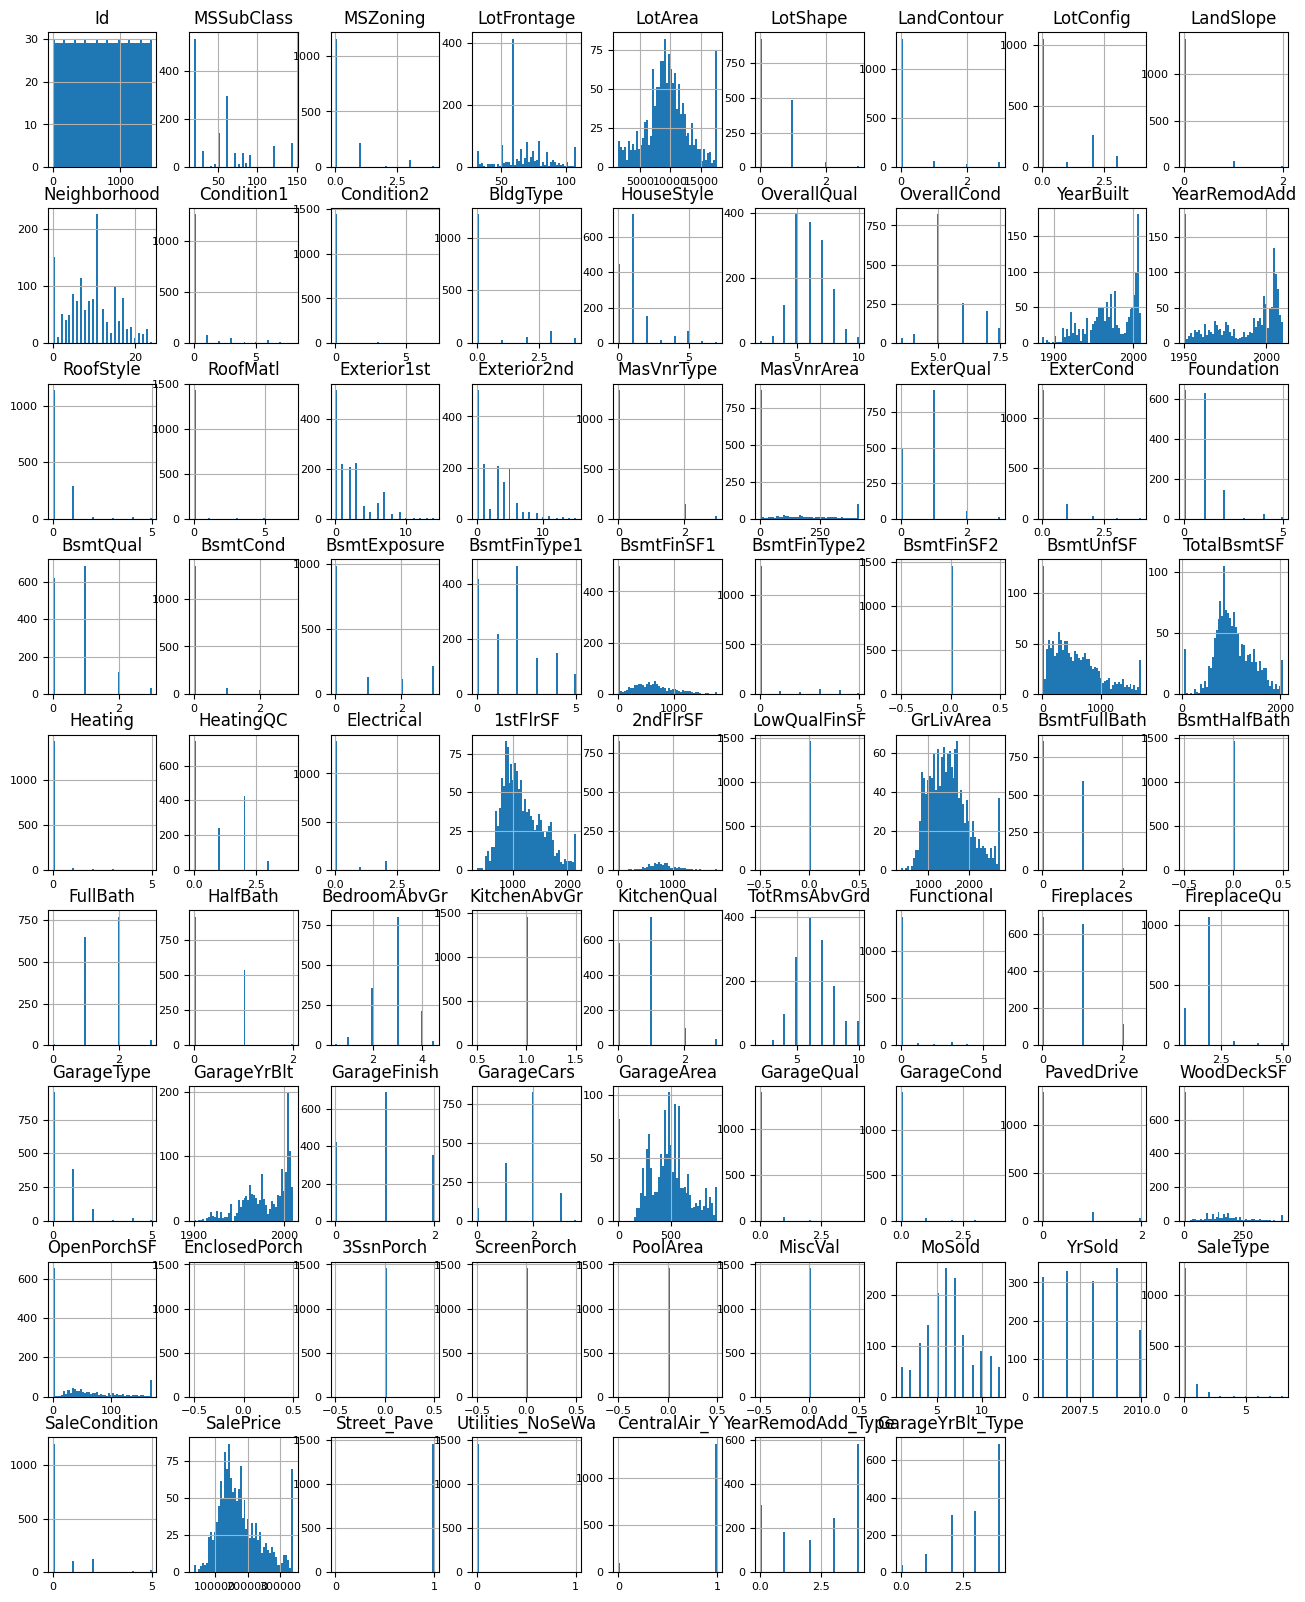

In [165]:
train_df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [166]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Street_Pave,Utilities_NoSeWa,CentralAir_Y,YearRemodAdd_Type,GarageYrBlt_Type
0,1.0,60.0,0.0,65.0,8450.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2008.0,0.0,0.0,208500.0,1,0,1,4,4
1,2.0,20.0,0.0,80.0,9600.0,0.0,0.0,1.0,0.0,1.0,...,5.0,2007.0,0.0,0.0,181500.0,1,0,1,2,3
2,3.0,60.0,0.0,68.0,11250.0,1.0,0.0,0.0,0.0,0.0,...,9.0,2008.0,0.0,0.0,223500.0,1,0,1,4,4
3,4.0,70.0,0.0,60.0,9550.0,1.0,0.0,2.0,0.0,2.0,...,2.0,2006.0,0.0,1.0,140000.0,1,0,1,1,4
4,5.0,60.0,0.0,84.0,14260.0,1.0,0.0,1.0,0.0,3.0,...,12.0,2008.0,0.0,0.0,250000.0,1,0,1,4,4


In [167]:
train_df.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Street_Pave,Utilities_NoSeWa,CentralAir_Y,YearRemodAdd_Type,GarageYrBlt_Type
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.00000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,55.085616,0.340411,67.493836,9647.388014,0.408219,0.195205,0.596575,0.062329,9.478082,...,6.321918,2007.815753,0.234932,0.35000,177331.526370,0.995890,0.000685,0.934932,2.420548,3.048630
std,421.610009,37.508183,0.798309,17.579984,3594.356399,0.582296,0.642010,1.010359,0.276232,5.837783,...,2.703626,1.328095,0.804553,0.88787,67205.835915,0.063996,0.026171,0.246731,1.597158,1.088776
min,1.000000,20.000000,0.000000,31.500000,1481.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2006.000000,0.000000,0.00000,34900.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,365.750000,20.000000,0.000000,60.000000,7553.500000,0.000000,0.000000,0.000000,0.000000,5.000000,...,5.000000,2007.000000,0.000000,0.00000,129975.000000,1.000000,0.000000,1.000000,1.000000,2.000000
50%,730.500000,50.000000,0.000000,63.000000,9478.500000,0.000000,0.000000,0.000000,0.000000,10.000000,...,6.000000,2008.000000,0.000000,0.00000,163000.000000,1.000000,0.000000,1.000000,3.000000,3.000000
75%,1095.250000,70.000000,0.000000,79.000000,11601.500000,1.000000,0.000000,1.000000,0.000000,13.000000,...,8.000000,2009.000000,0.000000,0.00000,214000.000000,1.000000,0.000000,1.000000,4.000000,4.000000
max,1460.000000,145.000000,4.000000,107.500000,17673.500000,3.000000,3.000000,4.000000,2.000000,24.000000,...,12.000000,2010.000000,8.000000,5.00000,340037.500000,1.000000,1.000000,1.000000,4.000000,4.000000


In [168]:
corr = train_df.corr(method='spearman')

In [169]:
corr

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Street_Pave,Utilities_NoSeWa,CentralAir_Y,YearRemodAdd_Type,GarageYrBlt_Type
Id,1.000000,0.019567,-0.028789,-0.035800,-0.005189,-0.031155,0.015680,-0.040115,0.018709,-0.019864,...,0.019018,0.001526,-0.026297,-0.017661,-0.018773,0.008916,0.013324,0.009821,-0.010120,-0.005726
MSSubClass,0.019567,1.000000,0.286467,-0.293698,-0.272491,-0.069403,-0.002160,-0.042180,-0.021231,0.114403,...,0.018372,-0.027189,-0.045635,-0.027522,0.007749,-0.016322,-0.029598,-0.103658,0.045021,0.120080
MSZoning,-0.028789,0.286467,1.000000,-0.325565,-0.432336,-0.255126,-0.005063,-0.104299,-0.041206,-0.080641,...,-0.000170,-0.011699,0.032502,0.057041,-0.275185,-0.048342,-0.013483,-0.197948,-0.020401,-0.035892
LotFrontage,-0.035800,-0.293698,-0.325565,1.000000,0.509694,0.018113,0.000959,0.026234,0.008220,-0.136517,...,0.030844,-0.002151,0.118406,0.096907,0.344032,-0.029608,-0.014128,0.087951,0.085685,0.054371
LotArea,-0.005189,-0.272491,-0.432336,0.509694,1.000000,0.340748,0.092366,0.220130,0.114455,-0.093175,...,0.006681,-0.027697,0.055006,0.032200,0.455582,-0.053222,0.036247,0.106238,0.055482,0.007997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Street_Pave,0.008916,-0.016322,-0.048342,-0.029608,-0.053222,-0.002006,-0.118160,-0.005970,-0.175988,-0.064418,...,0.002495,-0.023701,-0.009676,-0.001863,0.045816,1.000000,0.001682,0.069869,0.056312,0.026929
Utilities_NoSeWa,0.013324,-0.029598,-0.013483,-0.014128,0.036247,0.032233,-0.008811,0.053576,-0.006218,0.031784,...,-0.043864,0.024530,0.071878,0.048197,-0.016710,0.001682,1.000000,0.006907,-0.037372,-0.029270
CentralAir_Y,0.009821,-0.103658,-0.197948,0.087951,0.106238,0.111837,-0.069908,0.025092,-0.011416,-0.070010,...,0.015306,-0.009794,0.030833,0.017343,0.313298,0.069869,0.006907,1.000000,0.258766,0.162988
YearRemodAdd_Type,-0.010120,0.045021,-0.020401,0.085685,0.055482,0.136771,-0.059590,0.015595,-0.063164,-0.169335,...,0.011807,0.035479,0.165005,0.143243,0.562071,0.056312,-0.037372,0.258766,1.000000,0.577624


In [170]:
train_df.isnull().sum().sum()


0

In [171]:
corr_long = corr.stack().reset_index()
corr_long.columns = ['Feature1', 'Feature2', 'Correlation']

corr_long = corr_long[corr_long['Feature1'] != corr_long['Feature2']]
corr_long = corr_long[corr_long['Feature1'] < corr_long['Feature2']]

corr_long['AbsCorrelation'] = corr_long['Correlation'].abs()
sorted_corr = corr_long.sort_values(by='AbsCorrelation', ascending=False)

sorted_corr[sorted_corr["AbsCorrelation"]>0.8]

,Feature1,Feature2,Correlation,AbsCorrelation
1258,YearRemodAdd,YearRemodAdd_Type,0.960362,0.960362
3639,GarageYrBlt,GarageYrBlt_Type,0.935438,0.935438
1421,Exterior1st,Exterior2nd,0.865923,0.865923
3833,GarageArea,GarageCars,0.853340,0.853340
2694,1stFlrSF,TotalBsmtSF,0.829279,0.829279
2846,GrLivArea,TotRmsAbvGrd,0.827689,0.827689
1044,OverallQual,SalePrice,0.809714,0.809714


In [172]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 1460 non-null   float64
 1   MSSubClass         1460 non-null   float64
 2   MSZoning           1460 non-null   float64
 3   LotFrontage        1460 non-null   float64
 4   LotArea            1460 non-null   float64
 5   LotShape           1460 non-null   float64
 6   LandContour        1460 non-null   float64
 7   LotConfig          1460 non-null   float64
 8   LandSlope          1460 non-null   float64
 9   Neighborhood       1460 non-null   float64
 10  Condition1         1460 non-null   float64
 11  Condition2         1460 non-null   float64
 12  BldgType           1460 non-null   float64
 13  HouseStyle         1460 non-null   float64
 14  OverallQual        1460 non-null   float64
 15  OverallCond        1460 non-null   float64
 16  YearBuilt          1460 

In [173]:
X = train_df.drop(["Id","SalePrice", "Utilities_NoSeWa"], axis=1)
y = train_df["SalePrice"]

test_df_result = test_df.drop("Id", axis=1)

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [175]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
test_scaled_result = scaler.transform(test_df_result)

In [176]:
# Train and evaluate Linear Regression
LR = LinearRegression()
LR.fit(X_train_scaled, y_train)
y_pred = LR.predict(X_test_scaled)
print(f'Linear Regression Mean Squared Error: {mean_squared_error(y_test, y_pred)}')

Linear Regression Mean Squared Error: 518857148.10757214


In [178]:
# Train and evaluate Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
ridge_pred = ridge.predict(X_test_scaled)
print(f'Ridge Regression Mean Squared Error: {mean_squared_error(y_test, ridge_pred)}')

Ridge Regression Mean Squared Error: 516669647.5108415


In [179]:

# Train and evaluate Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
lasso_pred = lasso.predict(X_test_scaled)
print(f'Lasso Regression Mean Squared Error: {mean_squared_error(y_test, lasso_pred)}')

Lasso Regression Mean Squared Error: 518842900.27362686


In [180]:
# Train and evaluate ElasticNet Regression
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train_scaled, y_train)
elastic_net_pred = elastic_net.predict(X_test_scaled)
print(f'ElasticNet Regression Mean Squared Error: {mean_squared_error(y_test, elastic_net_pred)}')

ElasticNet Regression Mean Squared Error: 511973442.61441624


In [182]:
param_grid = {
    'alpha': [0.1, 1.0, 10.0],
    'l1_ratio': [0.1, 0.5, 0.9]
}

# Initialize Lasso model
elastic_net = ElasticNet()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Best parameters and model performance
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Cross-Validation Score: {grid_search.best_score_}')

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_pred = best_model.predict(X_test_scaled)
print(f'Test Mean Squared Error: {mean_squared_error(y_test, test_pred)}')

Best Parameters: {'alpha': 0.1, 'l1_ratio': 0.9}
Best Cross-Validation Score: -567015635.4553912
Test Mean Squared Error: 509620853.8793109


In [183]:
np.sqrt(509620853.8793109) #RMSE

22574.78358432946

In [184]:
pred = best_model.predict(test_df_result)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(


In [185]:
submission = pd.DataFrame({
    "Id" : test_df["Id"],
    "SalePrice" : pred
})

In [186]:
submission.to_csv('submission_1.csv', index=False)

In [190]:
joblib.dump(best_model, 'Best_model.pkl')

['Best_model.pkl']

In [208]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

SelectKBest = SelectKBest(f_regression, k=10)
bestFeature = SelectKBest.fit_transform(X, y)
SelectKBest.get_support()
X.columns[SelectKBest.get_support()]

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'GarageCars', 'GarageArea',
       'YearRemodAdd_Type'],
      dtype='object')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


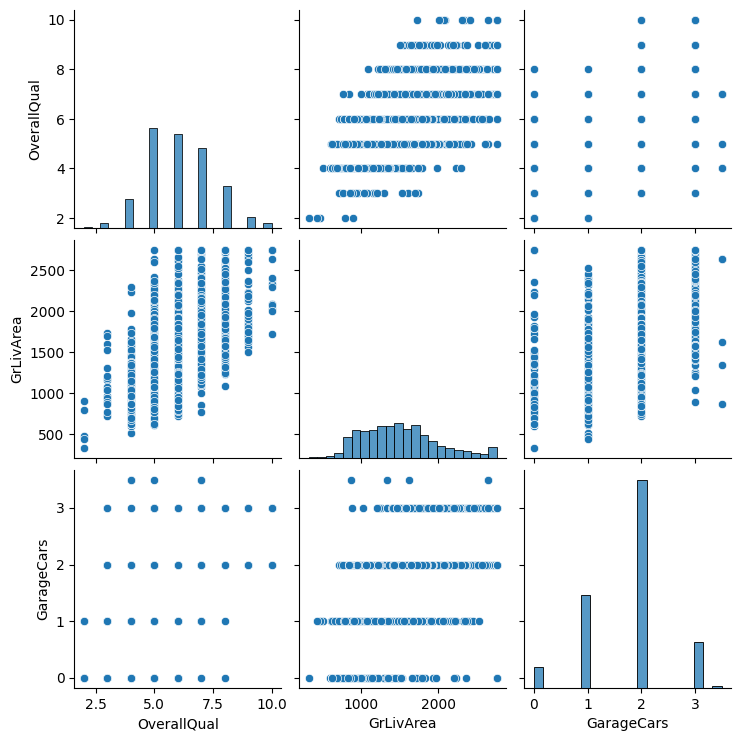

In [209]:
sns.pairplot(train_df[['OverallQual', 'GrLivArea', 'GarageCars']])

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred_class = model.predict(X_test)

In [211]:
print(f'Linear Regression Mean Squared Error: {mean_squared_error(y_test, y_pred_class)}')

Linear Regression Mean Squared Error: 672159839.1116768


In [212]:
missing_value = test_df.isnull().sum().sort_values(ascending=False)
missing_value[missing_value>0]

Series([], dtype: int64)

In [213]:
y_pred = model.predict(test_df.drop("Id", axis=1))

In [214]:
y_pred

array([140910.68024815, 186436.89395068, 215646.60885394, ...,
       192620.36214552, 139958.77352627, 250632.5240332 ])

In [215]:
output = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')
output['SalePrice'] = y_pred

output.to_csv('/kaggle/working/submission_2.csv', index=False)

output.head()

,Id,SalePrice
0,1461,140910.680248
1,1462,186436.893951
2,1463,215646.608854
3,1464,225812.793804
4,1465,203597.726127


In [220]:
corr["SalePrice"].abs().sort_values(ascending=False)[:10]

SalePrice       1.000000
OverallQual     0.809714
GrLivArea       0.731183
GarageCars      0.690616
YearBuilt       0.652564
GarageArea      0.649292
FullBath        0.635650
TotalBsmtSF     0.602495
1stFlrSF        0.575180
YearRemodAdd    0.571053
Name: SalePrice, dtype: float64

In [221]:
# Train and evaluate Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
print(f'Ridge Regression Mean Squared Error: {mean_squared_error(y_test, ridge_pred)}')

Ridge Regression Mean Squared Error: 671446365.2543602


In [222]:
y_pred = ridge.predict(test_df.drop("Id", axis=1))
output = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')
output['SalePrice'] = y_pred

output.to_csv('/kaggle/working/submission_ridge.csv', index=False)

output.head()

,Id,SalePrice
0,1461,140818.341749
1,1462,186278.765060
2,1463,215322.424714
3,1464,225509.227098
4,1465,203370.331986


In [223]:
# Train and evaluate Ridge Regression
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
print(f'Ridge Regression Mean Squared Error: {mean_squared_error(y_test, lasso_pred)}')
y_pred = lasso.predict(test_df.drop("Id", axis=1))
output = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')
output['SalePrice'] = y_pred

output.to_csv('/kaggle/working/submission_lasso.csv', index=False)

output.head()

Ridge Regression Mean Squared Error: 672189036.0809563


,Id,SalePrice
0,1461,140899.937281
1,1462,186420.799633
2,1463,215600.138883
3,1464,225761.760888
4,1465,203562.249993


In [225]:
# Train and evaluate ElasticNet Regression
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)
elastic_net_pred = elastic_net.predict(X_test)
print(f'ElasticNet Regression Mean Squared Error: {mean_squared_error(y_test, elastic_net_pred)}')
y_pred = elastic_net.predict(test_df.drop("Id", axis=1))
output = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')
output['SalePrice'] = y_pred

output.to_csv('/kaggle/working/submission_elastic_net.csv', index=False)

output.head()

ElasticNet Regression Mean Squared Error: 653878733.6197052


,Id,SalePrice
0,1461,139103.119855
1,1462,181697.223267
2,1463,205917.812234
3,1464,214543.458594
4,1465,194759.913109


In [226]:
param_grid = {
    'alpha': [0.1, 1.0, 10.0],
    'l1_ratio': [0.1, 0.5, 0.9]
}

# Initialize Lasso model
elastic_net = ElasticNet()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters and model performance
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Cross-Validation Score: {grid_search.best_score_}')

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_pred = best_model.predict(X_test)
print(f'Test Mean Squared Error: {mean_squared_error(y_test, test_pred)}')
y_pred = best_model.predict(test_df.drop("Id", axis=1))
output = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')
output['SalePrice'] = y_pred

output.to_csv('/kaggle/working/submission_best_model.csv', index=False)

output.head()

Best Parameters: {'alpha': 0.1, 'l1_ratio': 0.1}
Best Cross-Validation Score: -516219080.8214558
Test Mean Squared Error: 649432464.1822548


,Id,SalePrice
0,1461,138860.564264
1,1462,180261.569688
2,1463,203240.375750
3,1464,210841.530022
4,1465,191256.318724


In [227]:
joblib.dump(best_model, 'Best_model.pkl')

['Best_model.pkl']